In [15]:
#A1
import pandas as pd
import numpy as np

# Load the Excel file
file_path = 'training_mathbert 4.xlsx'
try:
    df = pd.read_excel(file_path, engine='openpyxl')
    print("Data loaded successfully")
except Exception as e:
    print("Error loading the file:", e)

# Check for NaN values
nan_summary = df.isna().sum()
nan_columns = nan_summary[nan_summary > 0]

if not nan_columns.empty:
    print("Columns with NaN values and their counts:")
    print(nan_columns)
else:
    print("No NaN values found in the dataset.")

# Modify the 'output' column for binary classification (1 if marks > 4, else 0)
df['output'] = df['output'].apply(lambda x: 1 if x > 4 else 0)

# Separate the data into two classes based on the 'output' column
class_0 = df[df['output'] == 0].iloc[:, :-1]  # Class 0 features
class_1 = df[df['output'] == 1].iloc[:, :-1]  # Class 1 features

# Remove columns with zero variance (if any)
class_0 = class_0.loc[:, class_0.var() > 0]
class_1 = class_1.loc[:, class_1.var() > 0]

# Step 1: Calculate the mean for each class (centroid)
centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

# Step 2: Calculate the spread (standard deviation) for each class
spread_0 = np.std(class_0, axis=0)
spread_1 = np.std(class_1, axis=0)

# Step 2b: Calculate the average intraclass spread (mean of standard deviations)
intraclass_spread_0 = np.mean(spread_0)
intraclass_spread_1 = np.mean(spread_1)

# Step 3: Calculate the distance between the class centroids
interclass_distance = np.linalg.norm(centroid_0 - centroid_1)

# Print the results
print(f"Centroid of Class 0 (Incorrect): \n{centroid_0}\n")
print(f"Centroid of Class 1 (Correct): \n{centroid_1}\n")
print(f"Spread (Standard Deviation) of Class 0: \n{spread_0}\n")
print(f"Spread (Standard Deviation) of Class 1: \n{spread_1}\n")
print(f"Average Intraclass Spread of Class 0: {intraclass_spread_0}")
print(f"Average Intraclass Spread of Class 1: {intraclass_spread_1}")
print(f"Interclass Distance (Euclidean Distance between centroids): {interclass_distance}\n")


Data loaded successfully
No NaN values found in the dataset.
Centroid of Class 0 (Incorrect): 
embed_0     -0.161784
embed_1      0.138127
embed_2      0.102261
embed_3      0.195169
embed_4     -0.487331
               ...   
embed_379   -0.221472
embed_380   -0.177041
embed_381    0.004041
embed_382    0.230634
embed_383   -0.026583
Length: 384, dtype: float64

Centroid of Class 1 (Correct): 
embed_0     -0.198083
embed_1      0.104167
embed_2      0.107169
embed_3      0.222668
embed_4     -0.492183
               ...   
embed_379   -0.196348
embed_380   -0.186991
embed_381    0.000478
embed_382    0.200886
embed_383   -0.039443
Length: 384, dtype: float64

Spread (Standard Deviation) of Class 0: 
embed_0      0.237502
embed_1      0.144161
embed_2      0.172769
embed_3      0.145255
embed_4      0.187546
               ...   
embed_379    0.187678
embed_380    0.212985
embed_381    0.138901
embed_382    0.191638
embed_383    0.150012
Length: 384, dtype: float64

Spread (Standard De

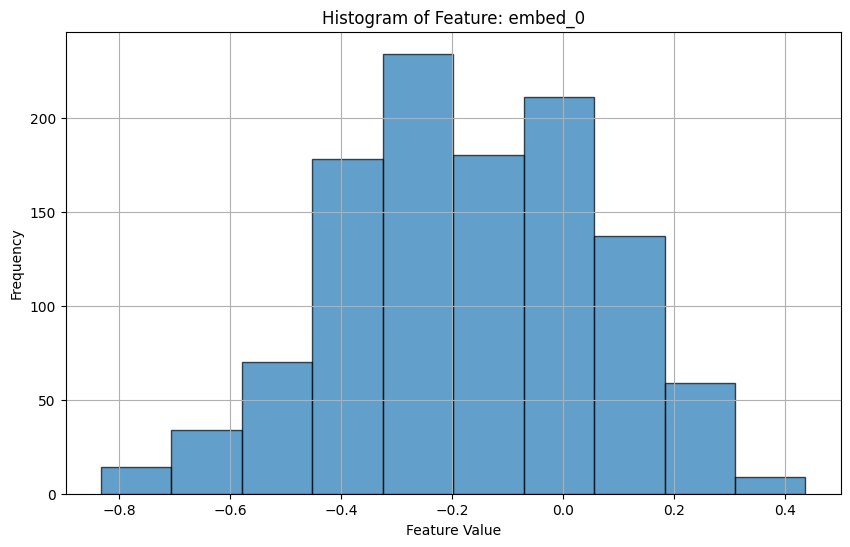

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925807


In [16]:
#A2
import numpy as np
import matplotlib.pyplot as plt

# Select a feature to analyze (e.g., the first feature in the dataset)
feature_name = df.columns[0]  # Modify this as needed
feature_data = df[feature_name]

# Calculate histogram data
hist_data, bin_edges = np.histogram(feature_data.dropna(), bins=10)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(feature_data.dropna(), bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of Feature: {feature_name}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and variance
mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)

# Print the results
print(f"Mean of {feature_name}: {mean_value}")
print(f"Variance of {feature_name}: {variance_value}")


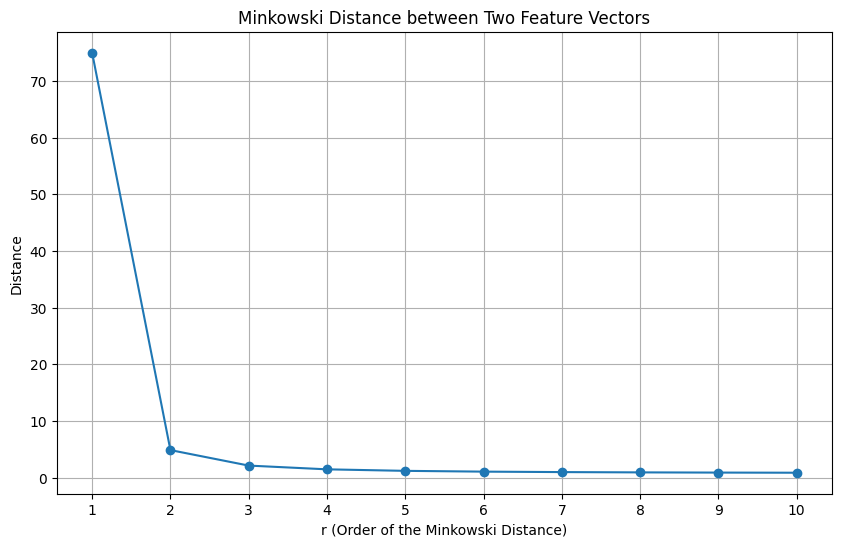

Minkowski Distance with r=1: 74.95742171496386
Minkowski Distance with r=2: 4.853526524381676
Minkowski Distance with r=3: 2.1203722613951492
Minkowski Distance with r=4: 1.4584931354061539
Minkowski Distance with r=5: 1.190435477588291
Minkowski Distance with r=6: 1.0528731355695171
Minkowski Distance with r=7: 0.9721489546673521
Minkowski Distance with r=8: 0.9205544826749266
Minkowski Distance with r=9: 0.8855801677671697
Minkowski Distance with r=10: 0.8608338902669797


In [17]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Select two feature vectors (e.g., the first and second rows of the dataset)
vector1 = df.iloc[0, :-1].values  # First feature vector (excluding the output column)
vector2 = df.iloc[1, :-1].values  # Second feature vector (excluding the output column)

# Define a range for r
r_values = np.arange(1, 11)

# Calculate Minkowski distances
distances = [np.linalg.norm(vector1 - vector2, ord=r) for r in r_values]

# Plot the Minkowski distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Order of the Minkowski Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)  # Set x-axis ticks to match r values
plt.show()

# Print the distances
for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance with r={r}: {dist}")


In [18]:
#A4
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Excel file
file_path = 'training_mathbert 4.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Modify the 'output' column for binary classification
df['output'] = df['output'].apply(lambda x: 1 if x > 4 else 0)

# Separate features and labels
X = df.iloc[:, :-1]  # Features (excluding the last column which is the output)
y = df['output']     # Labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 788 samples
Test set size: 338 samples


In [19]:
#A5
from sklearn.neighbors import KNeighborsClassifier

# Create the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the model details
print("kNN classifier trained with k=3")


kNN classifier trained with k=3


In [20]:
#A6
# Test the accuracy of the kNN classifier on the test set
accuracy = knn.score(X_test, y_test)

# Print the accuracy of the kNN classifier
print(f"Accuracy of kNN classifier on test set: {accuracy * 100:.2f}%")


Accuracy of kNN classifier on test set: 80.18%


In [21]:
#A7
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 3: Predict the class for all test vectors
y_pred = knn.predict(X_test_scaled)

# Print the predicted classes for the test set
print("Predicted classes for the test set:")
print(y_pred)

# Step 4: Predict for a single test vector (for example, the first one)
test_vect = X_test_scaled[0].reshape(1, -1)
pred_class = knn.predict(test_vect)

print(f"Predicted class for the first test vector: {pred_class}")


Predicted classes for the test set:
[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0]
Predicted class for the first test vector: [0]


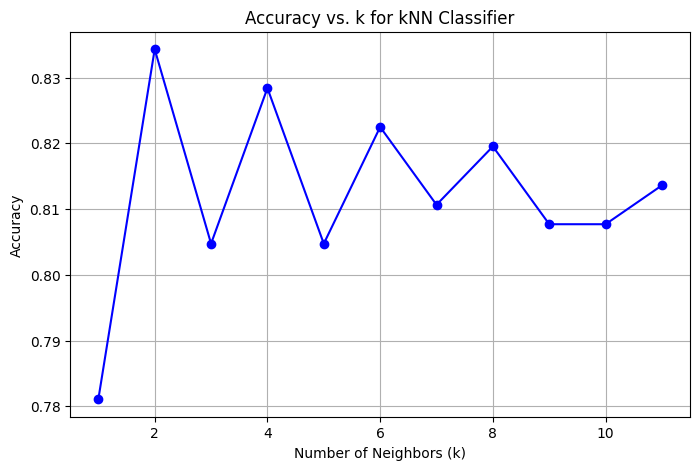

Accuracy for NN (k=1): 0.7811
Accuracy for k=3: 0.8047


In [22]:
#A8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Store accuracy for each k
k_values = range(1, 12)  # k from 1 to 11
accuracy_scores = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the accuracy for k=1 (NN) and k=3
print(f"Accuracy for NN (k=1): {accuracy_scores[0]:.4f}")
print(f"Accuracy for k=3: {accuracy_scores[2]:.4f}")


In [23]:
#A9
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on training data
y_train_pred = knn.predict(X_train_scaled)

# Predict on test data
y_test_pred = knn.predict(X_test_scaled)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Set:")
print(train_conf_matrix)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Set:")
print(test_conf_matrix)

# Precision, Recall, and F1-Score for training data
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

# Precision, Recall, and F1-Score for test data
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Check for underfitting/overfitting
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:
    print("Model is likely overfitting (high training accuracy, low test accuracy).")
elif test_accuracy > train_accuracy + 0.1:
    print("Model is likely underfitting (low training accuracy, higher test accuracy).")
else:
    print("Model has a good fit (similar training and test accuracy).")


Confusion Matrix for Training Set:
[[563  31]
 [109  85]]

Confusion Matrix for Test Set:
[[248  20]
 [ 43  27]]

Training Set Metrics:
Precision: 0.7328
Recall: 0.4381
F1-Score: 0.5484

Test Set Metrics:
Precision: 0.5745
Recall: 0.3857
F1-Score: 0.4615

Training Accuracy: 0.8223
Test Accuracy: 0.8136
Model has a good fit (similar training and test accuracy).
